# Define image dimensions, batch size and epochs



In [1]:
image_height = 256
image_width = 256
batch_size = 32
epochs = 10

# Define paths to your dataset

In [2]:
train_directory = 'Datasets/train'
validation_directory = 'Datasets/validation'
test_directory = 'Datasets/test'

Mounted at /content/drive


# Import libraries we use

In [18]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout
from PIL import Image

# Create data generators with data augmentation

In [4]:
ImageFlow = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.25,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Augment the dataset

In [5]:
classes = ['apple', 'banana', 'mixed', 'orange']

for class_name in classes:
    # Create a directory for each class
    image_directory = os.path.join(train_directory, class_name)

    for file_path in os.listdir(image_directory):
        # Check if the file is an image
        if os.path.isfile(file_path) and any(file_path.lower().endswith(ext) for ext in ['.png', '.jpg', '.jpeg']):
            # Open the image
            img = Image.open(file_path)

            # Check if the image has a palette
            if img.mode == 'P':
                # Convert the image to RGB
                img_rgb = img.convert('RGB')

                # Save the converted image, you can overwrite the original or save to a new file
                img_rgb.save(file_path)

                print(f"Converted {filename} to RGB")

    # Iterate over all the files in the directory
    for filename in os.listdir(image_directory):
        if filename.endswith('.jpg'):
            # Open the image file
            image_path = os.path.join(image_directory, filename)
            image = Image.open(image_path)

            # Convert the image to RGB mode
            image = image.convert('RGB')

            # Save the image with the same name
            image.save(image_path)

            # Close the image file
            image.close()

    # Generate augmented images and save them to the train dataset directory
    for filename in os.listdir(image_directory):
        img_path = os.path.join(image_directory, filename)
        img = plt.imread(img_path)  # Read the image using matplotlib
        img = img.reshape((1,) + img.shape)  # Reshape the image for augmentation
        save_dir = image_directory  # Set the directory to save the augmented images
        save_prefix = filename.split('.')[0] # Set the prefix for the saved images
        save_format = 'jpg'  # Set the format for the saved images

        # Generate augmented images and save them
        i = 0
        for batch in ImageFlow.flow(img, save_to_dir=save_dir, save_prefix=save_prefix, save_format=save_format):
            # Set the number of augmented images to generate
            number_of_augmented_images = 6 if class_name == 'mixed' else 3

            i += 1
            if i >= number_of_augmented_images:  # Generate 5 augmented images for each original image
                break

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


## Flow images in batches using the generators

In [6]:
train_generator = ImageFlow.flow_from_directory(
    train_directory,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    subset='training'
)

Found 765 images belonging to 4 classes.


In [7]:
validation_generator = ImageFlow.flow_from_directory(
    train_directory,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    subset='validation'
)

Found 255 images belonging to 4 classes.


In [8]:
steps_per_epoch = train_generator.n//batch_size

print(steps_per_epoch)

23


# Define the CNN model

In [9]:
model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(4, activation='softmax')  # Assuming there are 4 classes
    ])

# Compile the model

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

# Train the model

In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=validation_generator
)

Epoch 1/10
23/23 [==============================] - 32s 1s/step - loss: 1.9919 - accuracy: 0.4898 - val_loss: 0.8185 - val_accuracy: 0.7255
Epoch 2/10
23/23 [==============================] - 26s 1s/step - loss: 0.7946 - accuracy: 0.7299 - val_loss: 0.5016 - val_accuracy: 0.8196
Epoch 3/10
23/23 [==============================] - 23s 1s/step - loss: 0.6315 - accuracy: 0.7831 - val_loss: 0.4806 - val_accuracy: 0.8471
Epoch 4/10
23/23 [==============================] - 23s 1s/step - loss: 0.5433 - accuracy: 0.8063 - val_loss: 0.4248 - val_accuracy: 0.8353
Epoch 5/10
23/23 [==============================] - 25s 1s/step - loss: 0.4326 - accuracy: 0.8527 - val_loss: 0.2865 - val_accuracy: 0.9020
Epoch 6/10
23/23 [==============================] - 28s 1s/step - loss: 0.4128 - accuracy: 0.8649 - val_loss: 0.4014 - val_accuracy: 0.8706
Epoch 7/10
23/23 [==============================] - 28s 1s/step - loss: 0.4272 - accuracy: 0.8636 - val_loss: 0.3167 - val_accuracy: 0.8824
Epoch 8/10
23/23 [==

# Evaluate the model

In [12]:
model.evaluate(validation_generator)

8/8 [==============================] - 5s 609ms/step - loss: 0.3480 - accuracy: 0.9137


[0.34799185395240784, 0.9137254953384399]

# Plot training history

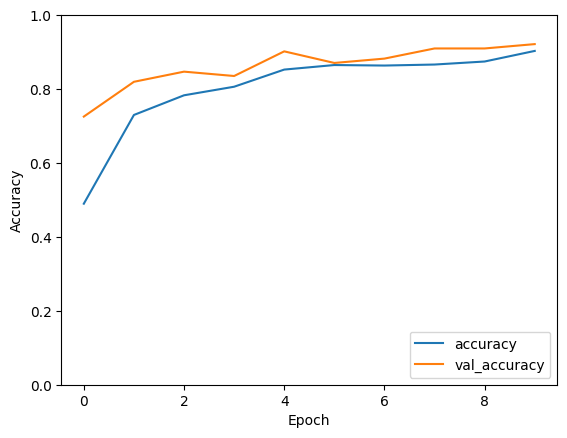

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Plot loss graph

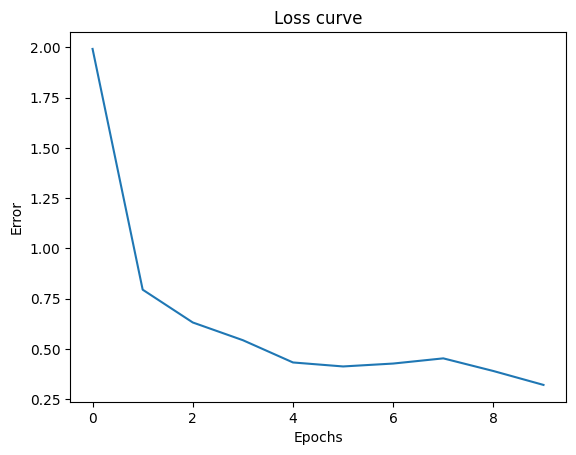

In [14]:
def plot_loss(history):
  _, ax = plt.subplots()

  plt.plot(history.history['loss'])
  ax.set_xlabel('Epochs')
  ax.set_ylabel('Error')
  ax.set_title('Loss curve')

  plt.show()

plot_loss(history)

In [21]:
# Make a folder to save the model
os.makedirs('Models', exist_ok=True)

# Save the model
model.save('Models/image_classification_model.h5')

# Load the trained model
model = models.load_model('Models/image_classification_model.h5')

# Get the list of test images
test_images = [f for f in os.listdir(test_directory) if f.endswith('.jpg')]

# Initialize lists to store results
image_names = []
actual_class = []
predicted_class = []

# Loop through each test image
for image_name in test_images:
    # Load and preprocess the test image
    img_path = os.path.join(test_directory, image_name)
    img = image.load_img(img_path, target_size=(image_height, image_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Make predictions
    predictions = model.predict(img_array)

    # Get the predicted class index
    predicted_label = np.argmax(predictions)
    actual_label = image_name.split('_')[0]

    # Store results
    image_names.append(image_name)
    actual_class.append(actual_label)
    predicted_class.append(predicted_label)

# Create a DataFrame to display the results
results_df = pd.DataFrame({'Image': image_names, 'Actual Class': actual_class, 'Predicted Class': predicted_class})

# Define class labels
class_labels = {0: 'apple', 1: 'banana', 2: 'mixed', 3: 'orange'}
results_df['Predicted Class'] = results_df['Predicted Class'].map(class_labels)

# Display the results
print(results_df)

# Make a folder to save the results
os.makedirs('Results', exist_ok=True)

# Save the results to a CSV file
results_df.to_csv('Results/result.csv', index=False)

# Calculate accuracy
correct_predictions = np.sum(np.array(actual_class) == np.array(results_df['Predicted Class']))
total_predictions = len(test_images)
accuracy = correct_predictions / total_predictions

# Display accuracy
print(f'\nTest Accuracy: {accuracy * 100}%')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 37ms/step
            Image Actual Class Predicted Class
0    apple_79.jpg        apple           apple
1   banana_80.jpg       banana          banana
2    apple_77.jpg        apple           apple
3    apple_90.jpg        apple           apple
4    apple_78.jpg        apple           apple
5    apple_81.jpg        apple           apple
6    apple_88.jpg        apple           apple
7    apple_92.jpg        apple           apple
8   banana_77.jpg       banana          banana
9    apple_95.jpg        apple           mixed
10   apple_82.jpg        apple           apple
11  banana_79.jpg       banana          banana
12   apple_83.jpg        apple           apple
13   apple_91.jpg        apple           apple
14   apple_87.jpg        apple           apple
15   apple_89.jpg        apple           apple
16   apple_85.jpg        apple           apple
17   apple_93.jpg        apple           apple
18  banana_78.jpg       banana          banana
19   app